# Logestic Regression

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Logestic regression model

In [4]:
class LogesticRegression ():
    def __init__(self,lr,epoch):
        self.lr = lr
        self.epoch = epoch
        
    def sigmoid(self,X):
        x = X.dot(self.W)
        return 1/(1+math.exp(-x))
        
    def fit (self,X,Y):
        m,n = X.shape
        self.W = np.zeros((n+1,1))
        self.X = np.hstack([X,np.ones(m).reshape((m,1))]) 

        for i in range(self.epoch):
            y = np.apply_along_axis(LR.sigmoid,1,self.X).T
            self.W = self.W+((self.lr*((Y-y).dot(self.X)).T)/m).reshape((n+1,1))
    
    def predict(self,X):
        m,n = X.shape
        x = np.hstack([X,np.ones(m).reshape((m,1))])
        return np.where(np.apply_along_axis(LR.sigmoid,1,x)>0.5,1,0)
        


### Simple Data For Debuging the model 

In [5]:
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9]])
Y = np.array([[0],[0],[0],[0],[1],[1],[1],[1],[1]])

### Trial 

In [6]:
LR = LogesticRegression(0.01,5000)

In [7]:
LR.fit(X,Y.T)

In [8]:
LR.predict(X)

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

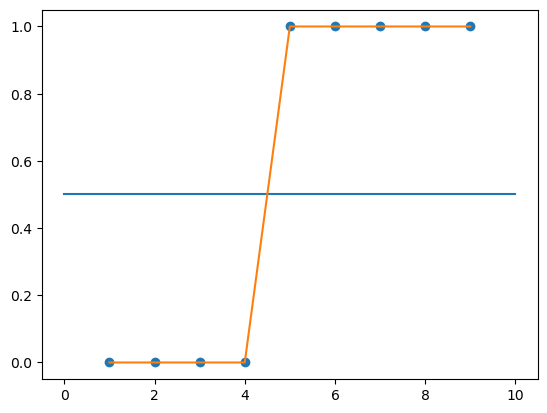

In [9]:
plt.scatter(X,Y)
plt.plot([0,10],[.5,0.5])
plt.plot(X,LR.predict(X))

#### This is a custom Example threfore 100% accuracy 

## Dibaties DataSet

In [10]:
data = pd.read_csv('./diabetes.csv')

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
data.shape

(768, 9)

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
feature = data.drop(columns='Outcome',axis=1)
target = data['Outcome']

## Data Standardization

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(feature)
standard_data = scaler.transform(feature)
standard_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2)

In [20]:
print(feature.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [21]:
LR=LogesticRegression(0.01,5000)

In [22]:
LR.fit(x_train,y_train)

## Accuracy Score

In [23]:
x_train_AS = accuracy_score(y_train,LR.predict(x_train))

In [24]:
x_test_AS = accuracy_score(y_test,LR.predict(x_test))

In [25]:
print(x_train_AS,x_test_AS)

0.6368078175895765 0.7142857142857143


## predictive classifier

In [26]:
inputdata = np.asarray([10,101,76,48,180,32.9,0.171,63]).reshape(1,-1)
k=scaler.transform(inputdata)
predict = LR.predict(k)

if(predict == 1):
    print("person is diabetic")
else:
    print("person is not diabetic")

person is diabetic


C:\Users\ramandeep.singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
